In [1]:
import os

In [2]:
import pandas as pd
import numpy as np

In [16]:
METHODS = ['default', 'ror','uniform','nri_uniform','var']
DATA_LBP_PATH = 'dataset/fish_data_lbp/resize/'
DATA_HOG_PATH = 'dataset/fish_data_hog'
DATA_HL_PATH = 'dataset/fish_data_houghline'
METHOD_INDEX = 0


In [18]:
df = pd.read_csv(os.path.join(DATA_LBP_PATH,METHODS[METHOD_INDEX],METHODS[METHOD_INDEX]+'_dense.csv'), header=None)
# df = pd.read_csv(os.path.join(DATA_HOG_PATH,'hog_fish.csv'), header=None)
df = df.drop(df[df[1]=='gymnocranius_ microdon'].index)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,1,A73EGS-P,1,0.029996,0.051033,0.004477,0.001441,0.004401,0.037168,0.002105,...,0.000191,0.004796,0.009656,0.009222,0.000867,0.033776,0.005344,0.004043,0.003010,0.276747
1,2,A73EGS-P,2,0.032996,0.054222,0.006582,0.000778,0.002003,0.015242,0.002207,...,0.000408,0.005791,0.001633,0.002640,0.000931,0.022054,0.002513,0.005867,0.003992,0.522372
2,3,A73EGS-P,3,0.030999,0.032615,0.003571,0.001173,0.002704,0.033903,0.002092,...,0.000102,0.005651,0.007015,0.006849,0.000676,0.032474,0.004209,0.005332,0.001901,0.317360
3,4,A73EGS-P,4,0.032999,0.060166,0.008686,0.001952,0.004936,0.032615,0.002232,...,0.000230,0.011824,0.008865,0.012985,0.000931,0.029158,0.008355,0.010867,0.005000,0.154145
4,5,A73EGS-P,5,0.034002,0.037921,0.003508,0.001008,0.003367,0.035204,0.001441,...,0.000128,0.003686,0.010599,0.010906,0.000332,0.029770,0.005357,0.003801,0.002513,0.300842
5,6,A73EGS-P,6,0.033999,0.036939,0.005765,0.000931,0.004145,0.035702,0.001824,...,0.000217,0.008087,0.011645,0.013559,0.000536,0.026964,0.006684,0.007003,0.002908,0.141097
6,7,A73EGS-P,7,0.030994,0.042079,0.004911,0.001365,0.004860,0.027474,0.001684,...,0.000332,0.004337,0.010893,0.011543,0.000663,0.025230,0.006594,0.004247,0.003610,0.268099
7,8,acanthaluteres_brownii,1,0.032000,0.009490,0.001327,0.000204,0.001658,0.028686,0.000663,...,0.000038,0.004209,0.015740,0.013393,0.000051,0.021084,0.004196,0.005638,0.000510,0.069069
8,9,acanthaluteres_brownii,2,0.040000,0.016926,0.002806,0.000268,0.001237,0.031301,0.001990,...,0.000089,0.007385,0.016135,0.012372,0.000204,0.026339,0.005089,0.009528,0.001327,0.152398
9,10,acanthaluteres_brownii,3,0.030005,0.015880,0.003584,0.000434,0.002589,0.025587,0.001250,...,0.000089,0.007232,0.012755,0.013240,0.000077,0.019911,0.006263,0.006786,0.002347,0.188750


In [6]:
# df = df.groupby(1).filter(lambda x: len(x) > 20)
# print(len(df[1].unique()))
# s = df.groupby(1)[1].count()
# for i in range(len(s)):
#     print(i+1,s.index[i],s[i])

In [7]:
# def get_species_name(x):
#     tempn = x[1].split('_')
#     return tempn[0]
# df[3] = df.apply(lambda x: get_species_name(x), axis=1)
# df.head()

In [8]:

COLUMN_CLASS = 1 #1
len(df[COLUMN_CLASS].unique())

483

In [9]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(df[COLUMN_CLASS].unique())

LabelBinarizer()

In [10]:
new_class = lb.transform(df[COLUMN_CLASS])
new_class.shape

(4412, 483)

In [11]:
index_input =[i for i in range(4,len(df.columns))]
index_class = 'class_idx'
index_combine = index_input.copy()
index_combine.append(index_class)

In [12]:
df[index_input].to_numpy()

array([[0.05103316, 0.00447704, 0.00144133, ..., 0.00404337, 0.0030102 ,
        0.27674745],
       [0.05422194, 0.00658163, 0.00077806, ..., 0.00586735, 0.00399235,
        0.52237245],
       [0.0326148 , 0.00357143, 0.00117347, ..., 0.00533163, 0.00190051,
        0.31735969],
       ...,
       [0.02668367, 0.00434949, 0.00110969, ..., 0.00575255, 0.00320153,
        0.23710459],
       [0.03691327, 0.00376276, 0.00112245, ..., 0.00440051, 0.00260204,
        0.07487245],
       [0.06447704, 0.00843112, 0.00127551, ..., 0.00604592, 0.00502551,
        0.37941327]])

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[index_input].copy().to_numpy(), new_class, 
                                                    test_size=0.3,random_state=1,stratify=new_class)

In [15]:
clf = MLPClassifier(hidden_layer_sizes=(400,500,400,350,250),solver='adam',random_state=1,n_iter_no_change=100, max_iter=1000, learning_rate_init=0.001).fit(X_train, y_train)

C:\Program Files\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
import matplotlib.pyplot as plt


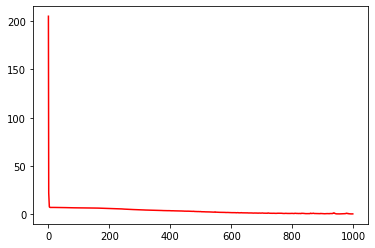

In [ ]:
plt.plot(clf.loss_curve_, 'r')
plt.show()

In [ ]:
import pickle

In [196]:
filename = 'model/lbp_11.sav'
pickle.dump(clf, open(filename, 'wb'))

In [36]:
clf.predict_proba(X_test)

array([[5.89448752e-25, 2.20886024e-39, 2.96119701e-55, ...,
        8.34214750e-17, 1.25200733e-62, 6.87776998e-26],
       [2.25127609e-19, 1.49988206e-35, 5.81963171e-60, ...,
        3.95917474e-18, 1.03966871e-62, 1.78156090e-26],
       [7.31702877e-40, 5.77577811e-24, 3.11784894e-26, ...,
        1.40792924e-36, 1.80146814e-39, 3.32437408e-31],
       ...,
       [5.42258722e-37, 2.41427029e-23, 8.85770401e-44, ...,
        1.09410111e-21, 1.65291693e-47, 8.09450890e-35],
       [4.83139068e-23, 3.12904251e-30, 5.43921627e-42, ...,
        4.92251349e-15, 1.15694907e-41, 1.19063383e-32],
       [2.35987795e-48, 4.45464539e-25, 1.10651712e-36, ...,
        5.33141195e-44, 7.72108164e-63, 8.10323033e-47]])

In [37]:
y_test_pred = clf.predict_log_proba(X_test)
y_test_pred

array([[ -55.79060973,  -89.00834197, -125.55658653, ...,  -37.0226259 ,
        -142.53552764,  -57.93891795],
       [ -42.93761956,  -80.18509178, -136.3938686 , ...,  -40.07049607,
        -142.72137366,  -59.28972253],
       [ -90.11319938,  -53.50836925,  -58.7300691 , ...,  -82.55094335,
         -89.21221666,  -70.17885647],
       ...,
       [ -83.50507539,  -52.07806006,  -99.1324565 , ...,  -48.26435383,
        -107.7189578 ,  -78.49929234],
       [ -51.38432279,  -67.93682574,  -95.01493892, ...,  -32.94495712,
         -94.26020239,  -73.50823718],
       [-109.66547456,  -56.07067986,  -82.791846  , ...,  -99.64012798,
        -143.0189064 , -106.12923658]])

In [197]:
clf.score(X_test, y_test)

0.03474320241691843

In [276]:
clf.predict_log_proba(X_test)

array([[-101.36914845,  -30.91893255, -112.43008255, ...,  -56.62187032,
         -85.1369212 ,  -60.93743523],
       [ -56.43189681,  -91.00623406,  -57.66884772, ...,  -69.39926109,
         -94.36152306,  -28.07662864],
       [ -85.47050291, -148.69056482, -158.97008042, ...,  -96.79556572,
        -141.87303126,  -72.12904608],
       ...,
       [ -56.19869426,  -42.13766069,  -73.23624822, ...,  -73.76561471,
         -37.80081151,  -75.95876039],
       [ -71.82125124,  -11.53286377,  -43.53427004, ...,  -65.72517931,
         -33.3184441 ,  -49.72562088],
       [ -14.32818929,  -63.62059078,  -25.12426156, ...,  -61.92270735,
         -55.06182513,  -38.98703825]])

In [253]:
from sklearn.metrics import confusion_matrix

In [254]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements
cm = confusion_matrix(lb.inverse_transform(y_test_pred), lb.inverse_transform(y_test))
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [255]:
acc = accuracy(cm)
acc

0.07636363636363637